## Dataset: [Superstore Dataset](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final?resource=download)

### Context

With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.

### Attributes

These will be the attributes to analyze:

*   Order Date
*   City
*   Profit

### Objective

Analyze the profict tendency per city and time of year.

### Visualization

A chart showing the profit tendency during the year of the top10 more profitable cities.






# Data Ingestion

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("Superstore.csv", encoding = "ISO-8859-1")
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
df.head

<bound method NDFrame.head of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       C

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  9994 non-null   object 
 1   Country     9994 non-null   object 
 2   City        9994 non-null   object 
 3   State       9994 non-null   object 
 4   Profit      9994 non-null   float64
dtypes: float64(1), object(4)
memory usage: 390.5+ KB


In [5]:
df = df.drop(['Row ID','Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount'], axis=1)
df.columns

Index(['Order Date', 'Country', 'City', 'State', 'Profit'], dtype='object')

## Grouping per city and obtaining the top10 more profitable 



<Axes: xlabel='Country,State,City'>

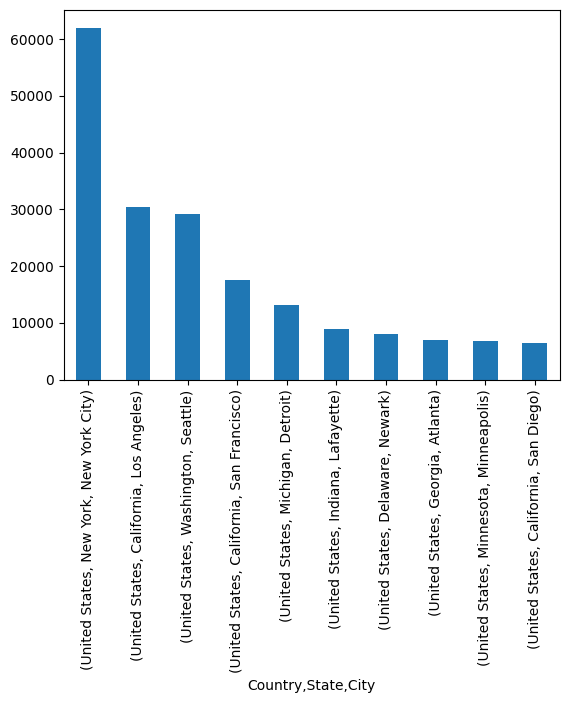

In [4]:
df.groupby(["Country", "State", "City"])["Profit"].sum().sort_values(ascending=False).nlargest(10).plot(kind="bar")

From previous query we can see New York it the most profitable city, almos duplicating the second one California.

# Checking for null values

In [5]:
nullsMask = df.isna()
print(f"Total nulls in Order Date: {nullsMask['Order Date'].value_counts()}")
print(f"Total nulls in Country: {nullsMask.Country.value_counts()}") 
print(f"Total nulls in City: {nullsMask.City.value_counts()}") 
print(f"Total nulls in State: {nullsMask.State.value_counts()}") 
print(f"Total nulls in Profit: {nullsMask.Profit.value_counts()}") 


Total nulls in Order Date: False    9994
Name: Order Date, dtype: int64
Total nulls in Country: False    9994
Name: Country, dtype: int64
Total nulls in City: False    9994
Name: City, dtype: int64
Total nulls in State: False    9994
Name: State, dtype: int64
Total nulls in Profit: False    9994
Name: Profit, dtype: int64


Data is clean. There are no nulls.

# Check For Duplicates

In [6]:
duplicateRowsDF = df[df.duplicated(subset=["Country", "State", "City", "Order Date", "Profit"], keep=False)]
print(duplicateRowsDF)

     Order Date        Country        City     State   Profit
2579  1/26/2014  United States  Alexandria  Virginia   0.0000
2582  1/26/2014  United States  Alexandria  Virginia   0.0000
3405  4/23/2014  United States    Columbus      Ohio -12.0588
3406  4/23/2014  United States    Columbus      Ohio -12.0588


There are a couple of duplicates. These could be valid duplicated purchaese. Just to be sure we will remove them.

In [7]:
df = df.drop_duplicates(subset=["Country", "State", "City", "Order Date", "Profit"], keep="first")
duplicateRowsDF = df[df.duplicated(subset=["Country", "State", "City", "Order Date", "Profit"], keep=False)]
print(duplicateRowsDF)

Empty DataFrame
Columns: [Order Date, Country, City, State, Profit]
Index: []


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9992 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  9992 non-null   object 
 1   Country     9992 non-null   object 
 2   City        9992 non-null   object 
 3   State       9992 non-null   object 
 4   Profit      9992 non-null   float64
dtypes: float64(1), object(4)
memory usage: 468.4+ KB


# Converting Order Date to datetime variable

In [8]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9992 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9992 non-null   datetime64[ns]
 1   Country     9992 non-null   object        
 2   City        9992 non-null   object        
 3   State       9992 non-null   object        
 4   Profit      9992 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 468.4+ KB


In [8]:
df["Order Date"].dt.year
df["Order Date"].dt.month
df["Order Date"].dt.day

0        8
1        8
2       12
3       11
4       11
        ..
9989    21
9990    26
9991    26
9992    26
9993     4
Name: Order Date, Length: 9992, dtype: int64

# Filtering by year 2017 and grouping per month to view most profitable months.

<Axes: title={'center': 'Ciudades con meses de más ganancias del 2017'}, ylabel='Country,State,City,Order Date'>

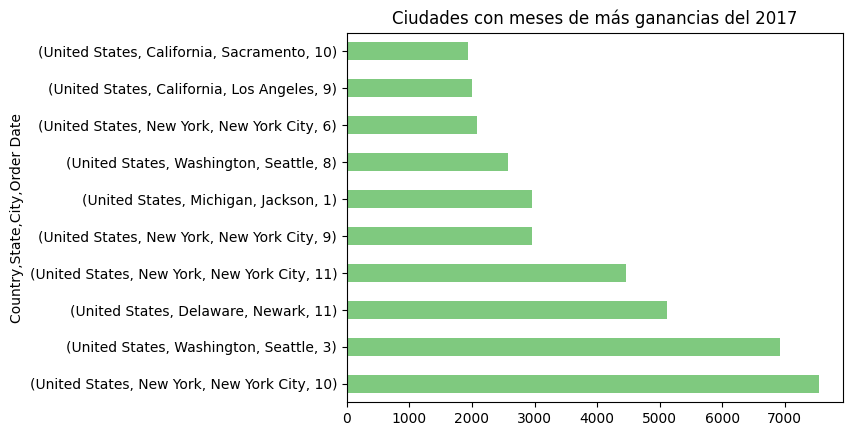

In [9]:
df_year_2017 = df[df['Order Date'].dt.strftime('%Y') == '2017']
df_year_2017 = df_year_2017.groupby(["Country", "State", "City", df['Order Date'].dt.month])["Profit"].sum().sort_values(ascending=False).nlargest(10)
df_year_2017.plot(kind="barh", colormap="Accent", title = "Ciudades con meses de más ganancias del 2017")


# Installing Google Maps

In [10]:
pip install -U googlemaps


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40718 sha256=0d029a82ecf3861e02141b7ade2a5fa7ec41bbe77378001fbb77590422e0de04
  Stored in directory: /root/.cache/pip/wheels/17/f8/79/999d5d37118fd35d7219ef57933eb9d09886c4c4503a800f84
Successfully built googlemaps


In [ ]:
# Creating Google Maps object using key created with Google Cloud

In [11]:
import googlemaps
gmaps = googlemaps.Client(key='XXX') 

# Function that thes the city and state and generates coordinates using Google's API. It uses a cache to avoid calling repeated cities.

In [20]:
city_coordinates_cache = {}

def get_coordinates(r):
  key = r['State']+r['City']
  if key in city_coordinates_cache:
    return city_coordinates_cache[key]
  geocode_result = gmaps.geocode(f"{r['City']}, {r['State']}")
  geo_location = geocode_result[0]['geometry']['location']
  city_coordinates_cache[key] = geo_location
  r['lat'] = geo_location['lat']
  r['lng'] = geo_location['lng']
  return r

df_with_coordinates = df.apply(get_coordinates, axis=1)
df_with_coordinates

,City,Country,Order Date,Profit,State,lat,lng
0,Henderson,United States,2016-11-08,41.9136,Kentucky,37.836154,-87.590013
1,NaN,NaN,NaT,NaN,NaN,37.836154,-87.590013
2,Los Angeles,United States,2016-06-12,6.8714,California,34.052234,-118.243685
3,Fort Lauderdale,United States,2015-10-11,-383.0310,Florida,26.122439,-80.137317
4,NaN,NaN,NaT,NaN,NaN,26.122439,-80.137317
...,...,...,...,...,...,...,...
9989,NaN,NaN,NaT,NaN,NaN,25.761680,-80.191790
9990,NaN,NaN,NaT,NaN,NaN,33.663844,-117.904743
9991,NaN,NaN,NaT,NaN,NaN,33.663844,-117.904743
9992,NaN,NaN,NaT,NaN,NaN,33.663844,-117.904743


# Installing Folium

In [22]:
pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import folium

# Create a grouping for the top10 most profitable cities of 2017

In [40]:
df_year_2017 = df_with_coordinates[df_with_coordinates['Order Date'].dt.strftime('%Y') == '2017']
df_year_2017 = df_year_2017.groupby(["Country", "State", "City", df_year_2017['Order Date'].dt.month, 'lat', 'lng'])["Profit"].sum().sort_values(ascending=False).nlargest(10).reset_index()
df_year_2017

,Country,State,City,Order Date,lat,lng,Profit
0,United States,Montana,Great Falls,1,47.505285,-111.300771,1379.9770
1,United States,Oklahoma,Muskogee,10,35.747877,-95.369691,374.3792
2,United States,Minnesota,Maple Grove,7,45.072464,-93.455788,331.1910
3,United States,California,Anaheim,6,33.836593,-117.914301,310.9872
4,United States,Mississippi,Jackson,8,32.298757,-90.184810,225.2640
5,United States,Missouri,Independence,12,39.091116,-94.415507,218.2518
6,United States,Connecticut,Milford,6,41.230698,-73.064036,185.2578
7,United States,Georgia,Columbus,3,32.460976,-84.987709,168.4384
8,United States,Indiana,Lawrence,8,39.838652,-86.025261,166.0698
9,United States,California,Lake Forest,8,33.646944,-117.686102,152.0232


# Creating the map with the cities

In [44]:
us = [52.6645,-101.299591]
mapa = folium.Map(location=us, zoom_start=15, max_zoom=3, min_zoom=2)

# El método iterrows genera un iterador para las observaciones de un DataFrame:
for index, row in df_year_2017.iterrows():
    lat_lon = row.lat, row.lng
    tooltip = row.City
    contents = f"<b>{tooltip}</b><br><i>{row.Profit}</i>"
    folium.Marker(lat_lon, popup=contents, tooltip=tooltip).add_to(mapa)

mapa